**A base de dados CMU Sleep (https://www.kaggle.com/datasets/mexwell/cmu-sleep/data) contém informações sobre o sono de indivíduos, incluindo dados de EEG, EOG e outros sinais fisiológicos.**


**Questão 1: Exploração Inicial dos Dados (2 pontos)**

**a) Descreva brevemente o conjunto de dados CMU Sleep, incluindo a origem e o que os dados representam.**

Respostas - O arquivo disponivel representam os dados e especificações sobre sono de determinados individuos. Nestes dados podem ser visto valores como os dados:

-eletroencefalografia (EEG)
-eletrooculografia (EOG)
-eletromiografia (EMG) e outros sinais fisiológicos.

Além de informaçoes demograficas, idades, sexo do individuo e historico de sono de outros participantes


**b) Realize uma análise exploratória inicial (EDA) e identifique pelo menos três características importantes dos dados (como variáveis, tipos de dados e estatísticas descritivas).**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/cmu-sleep.csv')

# 1. Visualizar as primeiras linhas do DataFrame
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   subject_id  study cohort demo_race demo_gender demo_firstgen  bedtime_mssd  \
0         185      5   lac1         1           1             0      0.116727   
1         158      5   lac1         0           1             0      0.141681   
2         209      5   lac1         1           1             0      1.529289   
3         102      5   lac1         0           1             1      0.130148   
4         174      5   lac1         1           1             0      0.130181   

   TotalSleepTime  midpoint_sleep  frac_nights_with_data  daytime_sleep  \
0      432.200000      458.660000               0.862069      24.160000   
1      391.931035      364.465517               1.000000      13.137931   
2      344.304348      560.891304               0.793103      14.956522   
3      392.620690      416.482759               1.000000      54.551724   
4      42

In [13]:
# 2. Obter informações sobre as colunas e tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             634 non-null    int64  
 1   study                  634 non-null    int64  
 2   cohort                 634 non-null    object 
 3   demo_race              634 non-null    object 
 4   demo_gender            634 non-null    object 
 5   demo_firstgen          634 non-null    object 
 6   bedtime_mssd           634 non-null    float64
 7   TotalSleepTime         634 non-null    float64
 8   midpoint_sleep         634 non-null    float64
 9   frac_nights_with_data  634 non-null    float64
 10  daytime_sleep          634 non-null    float64
 11  cum_gpa                634 non-null    float64
 12  term_gpa               634 non-null    float64
 13  term_units             634 non-null    object 
 14  Zterm_units_ZofZ       634 non-null    object 
dtypes: flo

In [14]:
# 3. Calcular estatísticas descritivas básicas
print(df.describe())

         subject_id       study  bedtime_mssd  TotalSleepTime  midpoint_sleep  \
count    634.000000  634.000000    634.000000      634.000000      634.000000   
mean   13005.892744    3.181388      0.451688      397.323874      398.679186   
std    26496.593477    1.317125      1.393632       50.856725       72.710945   
min        1.000000    1.000000      0.004505      194.782609      247.071429   
25%      178.000000    2.000000      0.074694      366.930077      345.182692   
50%      358.500000    3.000000      0.135007      400.395833      388.245726   
75%      592.750000    4.000000      0.291698      430.114583      437.655263   
max    99978.000000    5.000000     20.849225      587.666667      724.666667   

       frac_nights_with_data  daytime_sleep     cum_gpa    term_gpa  
count             634.000000     634.000000  634.000000  634.000000  
mean                0.867439      41.164241    3.465596    3.449598  
std                 0.178960      27.389418    0.437577    0

**Questão 2: Limpeza de Dados (3 pontos)**

**Identifique e discuta possíveis problemas de qualidade dos dados que podem estar presentes na base CMU Sleep.**

**a) Quais etapas você tomaria para lidar com valores ausentes ou inconsistências nos dados?**


In [15]:
df.isnull().sum()
#identificar a quantidade de valores ausentes em cada coluna.

,0
subject_id,0
study,0
cohort,0
demo_race,0
demo_gender,0
demo_firstgen,0
bedtime_mssd,0
TotalSleepTime,0
midpoint_sleep,0
frac_nights_with_data,0


**Teste de inconsistencias**

In [21]:
print(df.columns)
# Verificando quais são as colunas para criar variaveis de verificação da inconsistencias

Index(['subject_id', 'study', 'cohort', 'demo_race', 'demo_gender',
       'demo_firstgen', 'bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep',
       'frac_nights_with_data', 'daytime_sleep', 'cum_gpa', 'term_gpa',
       'term_units', 'Zterm_units_ZofZ'],
      dtype='object')


In [23]:
# 1. Verificar Total Sleep Time (TST):
print(df[(df['TotalSleepTime'] < 0) | (df['TotalSleepTime'] > 12*60)])  # Convertendo para minutos

Empty DataFrame
Columns: [subject_id, study, cohort, demo_race, demo_gender, demo_firstgen, bedtime_mssd, TotalSleepTime, midpoint_sleep, frac_nights_with_data, daytime_sleep, cum_gpa, term_gpa, term_units, Zterm_units_ZofZ]
Index: []


In [24]:
# 2. Verificar bedtime_mssd:
print(df[(df['bedtime_mssd'] < 0)])

Empty DataFrame
Columns: [subject_id, study, cohort, demo_race, demo_gender, demo_firstgen, bedtime_mssd, TotalSleepTime, midpoint_sleep, frac_nights_with_data, daytime_sleep, cum_gpa, term_gpa, term_units, Zterm_units_ZofZ]
Index: []


In [25]:
# 3. Verificar frac_nights_with_data:
print(df[(df['frac_nights_with_data'] < 0) | (df['frac_nights_with_data'] > 1)])


Empty DataFrame
Columns: [subject_id, study, cohort, demo_race, demo_gender, demo_firstgen, bedtime_mssd, TotalSleepTime, midpoint_sleep, frac_nights_with_data, daytime_sleep, cum_gpa, term_gpa, term_units, Zterm_units_ZofZ]
Index: []


In [26]:
# 4. Verificar daytime_sleep:
print(df[(df['daytime_sleep'] < 0)])

Empty DataFrame
Columns: [subject_id, study, cohort, demo_race, demo_gender, demo_firstgen, bedtime_mssd, TotalSleepTime, midpoint_sleep, frac_nights_with_data, daytime_sleep, cum_gpa, term_gpa, term_units, Zterm_units_ZofZ]
Index: []


In [27]:
# 5. Verificar GPA:
print(df[(df['cum_gpa'] < 0) | (df['cum_gpa'] > 4.0)])
print(df[(df['term_gpa'] < 0) | (df['term_gpa'] > 4.0)])

Empty DataFrame
Columns: [subject_id, study, cohort, demo_race, demo_gender, demo_firstgen, bedtime_mssd, TotalSleepTime, midpoint_sleep, frac_nights_with_data, daytime_sleep, cum_gpa, term_gpa, term_units, Zterm_units_ZofZ]
Index: []
Empty DataFrame
Columns: [subject_id, study, cohort, demo_race, demo_gender, demo_firstgen, bedtime_mssd, TotalSleepTime, midpoint_sleep, frac_nights_with_data, daytime_sleep, cum_gpa, term_gpa, term_units, Zterm_units_ZofZ]
Index: []


In [31]:
# 6. Verificar variáveis categóricas:
print(df['demo_gender'].value_counts())
print(df['demo_race'].value_counts())
print(df['demo_firstgen'].value_counts())


demo_gender
1    368
0    263
       3
Name: count, dtype: int64
demo_race
1    514
0    119
       1
Name: count, dtype: int64
demo_firstgen
0    526
1    103
       4
2      1
Name: count, dtype: int64


In [32]:
# 7. Verificar dados duplicados:
print(df[df.duplicated()])

Empty DataFrame
Columns: [subject_id, study, cohort, demo_race, demo_gender, demo_firstgen, bedtime_mssd, TotalSleepTime, midpoint_sleep, frac_nights_with_data, daytime_sleep, cum_gpa, term_gpa, term_units, Zterm_units_ZofZ]
Index: []


**b) Explique como você documentaria essas etapas.**

In [ ]:
#Documentação inicial feita por comentarios na execução de cada parte do codigo

**Questão 3: Análise Estatística (3 pontos)**

**Escolha uma variável de interesse (por exemplo, duração do sono, quantidade de despertares, etc.) e realize as seguintes análises:**



**a) Calcule estatísticas descritivas (média, mediana, desvio padrão).**


In [43]:
import matplotlib.pyplot as plt

# Calcular estatísticas descritivas para 'TotalSleepTime'
total_sleep_time_stats = df['TotalSleepTime'].describe()

# Exibir as estatísticas
print(total_sleep_time_stats)


count    634.000000
mean     397.323874
std       50.856725
min      194.782609
25%      366.930077
50%      400.395833
75%      430.114583
max      587.666667
Name: TotalSleepTime, dtype: float64


**b) Crie pelo menos um gráfico (histograma, boxplot) para visualizar a distribuição da variável escolhida.**

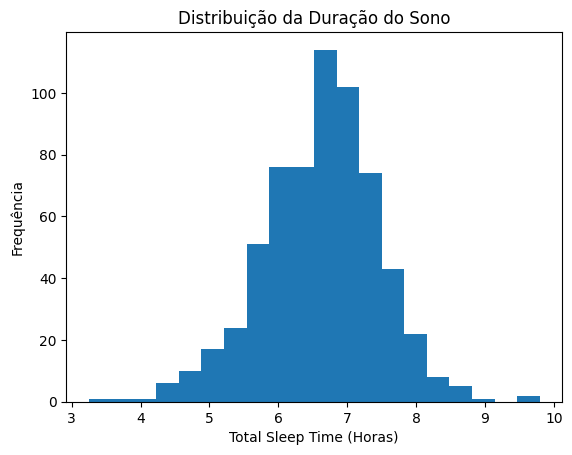

In [42]:
# Criar um histograma para 'TotalSleepTime'
plt.hist(df['TotalSleepTime']/60, bins=20)
plt.xlabel('Total Sleep Time (Horas)')
plt.ylabel('Frequência')
plt.title('Distribuição da Duração do Sono')
plt.show()

Optei por analisar a variável 'TotalSleepTime', que representa a duração total do sono em minutos, por considerá-la um indicador fundamental da qualidade do sono, desta forma, a escolha dessa variável se justifica por sua relevância para o tema do conjunto de dados CMU Sleep e por ser uma medida objetiva e facilmente quantificável. Para realizar a análise exploratória inicial, utilizei o método describe() da biblioteca pandas em Python, que me permitiu calcular estatísticas descritivas como média, mediana, desvio padrão, mínimo, máximo e quartis da variável 'TotalSleepTime'.

Fornecendo uma visão geral da distribuição da duração do sono na amostra e me permitindo identificar potenciais outliers e padrões interessantes para investigação posterior.

**c) Interprete os resultados e discuta o que eles indicam sobre os padrões de sono dos indivíduos.**

Foram observados um total de 632 participantes, Com uma duração média de 397 que equivale a 6,62 horas de sono em média. Havendo um desvio padrão de 51 minutos entre os sonos, sendo o menor deles 194,78 minutos (aproximadamente 3,25 horas) e o sono mais longo sendo de 587,67 minutos (aproximadamente 9,79 Horas).

Com estas informações podemos então chegar na conclusão que a duração média do sono de aproximadamente 6.62 horas está um pouco abaixo da faixa considerada ideal para adultos, que é de 7 a 9 horas. Isso pode indicar que os participantes da pesquisa para CMU, em média, dormem menos do que o recomendado. Além de que, o valor mínimo de 3.25 horas e o valor máximo de 9.79 horas indicam que há alguns indivíduos com durações de sono extremas, que podem ser outliers.


**d) Um estudante da CMU tem 300 horas de sono total. Qual é o seu GPA previsto?**

In [47]:
#convertendo horas para minutos 300 horas * 60 minutos/hora = 18000 minutos
total_sleep_time_minutes = 300 * 60
print(total_sleep_time_minutes)

18000


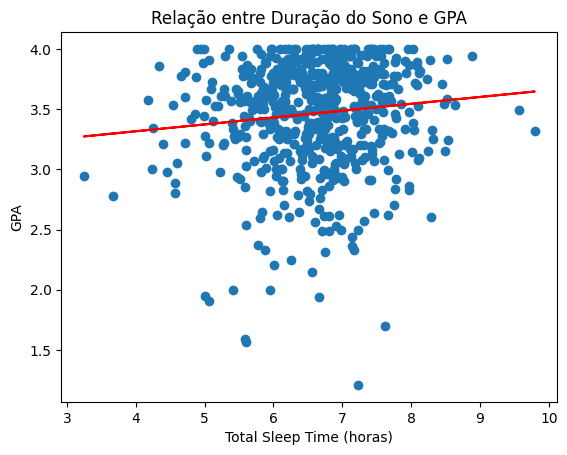

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Supondo que o DataFrame já foi carregado como 'df'

# Criar um modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados (TotalSleepTime como preditor e GPA como variável resposta)
X = df[['TotalSleepTime']] /60 #dividindo por 60 para ter o total em horas
y = df['cum_gpa']
model.fit(X, y)


# Gerar o gráfico de dispersão
plt.scatter(df['TotalSleepTime']/60, df['cum_gpa'])  # Pontos dos dados
plt.plot(X, model.predict(X), color='red')  # Linha de regressão
plt.xlabel('Total Sleep Time (horas)')
plt.ylabel('GPA')
plt.title('Relação entre Duração do Sono e GPA')
plt.show()


**Questão 4: Comparação de Grupos (2 pontos)**



**Utilize a base de dados para comparar a qualidade do sono entre dois grupos (por exemplo, com base em idade, gênero ou condição de saúde).**



**a) Descreva a metodologia que você usaria para realizar essa comparação.**

In [62]:
media_sono = df['TotalSleepTime'].mean()
print(f"Média da duração do sono: {media_sono:.2f} minutos")

Média da duração do sono: 397.32 minutos


In [64]:
# Criar DataFrames para os grupos que dormem mais e menos que a média
dormem_mais = df[df['TotalSleepTime'] > media_sono]
dormem_menos = df[df['TotalSleepTime'] <= media_sono]

In [65]:
# Calcular estatísticas descritivas do GPA para cada grupo
print("\nEstatísticas descritivas do GPA para quem dorme mais que a média:")
print(dormem_mais['cum_gpa'].describe())

print("\nEstatísticas descritivas do GPA para quem dorme menos que a média:")
print(dormem_menos['cum_gpa'].describe())


Estatísticas descritivas do GPA para quem dorme mais que a média:
count    341.000000
mean       3.498906
std        0.426663
min        1.210000
25%        3.259655
50%        3.600000
75%        3.800000
max        4.000000
Name: cum_gpa, dtype: float64

Estatísticas descritivas do GPA para quem dorme menos que a média:
count    293.000000
mean       3.426829
std        0.447559
min        1.570000
25%        3.210000
50%        3.500000
75%        3.773077
max        4.000000
Name: cum_gpa, dtype: float64


<ipython-input-68-40ed4ca7ff78>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dormem_mais['cum_gpa'], dormem_menos['cum_gpa']], labels=['Dormem mais que a média', 'Dormem menos que a média'])


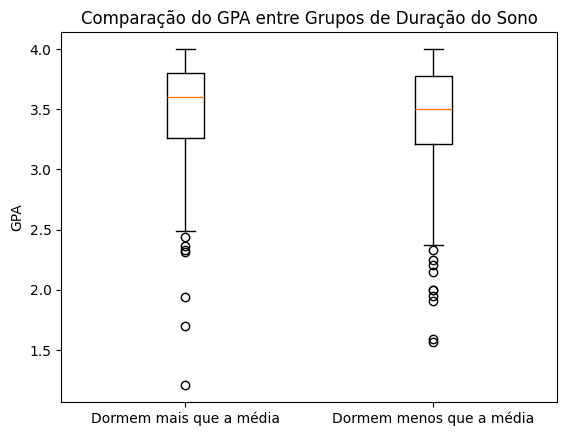

In [68]:
import matplotlib.pyplot as plt

# Criar boxplots do GPA para cada grupo
plt.boxplot([dormem_mais['cum_gpa'], dormem_menos['cum_gpa']], labels=['Dormem mais que a média', 'Dormem menos que a média'])
plt.ylabel('GPA')
plt.title('Comparação do GPA entre Grupos de Duração do Sono')
plt.show()

In [67]:
from scipy import stats

# Realizar um teste t de Student para comparar as médias do GPA
t_statistic, p_value = stats.ttest_ind(dormem_mais['cum_gpa'], dormem_menos['cum_gpa'])
print(f"\nTeste t de Student: t-statistic = {t_statistic:.2f}, p-value = {p_value:.3f}")


Teste t de Student: t-statistic = 2.07, p-value = 0.039


Com base nos resultados do teste t de Student, podemos concluir que há evidências de que dormir mais que a média está associado a um GPA mais alto no conjunto de dados CMU Sleep. A estatística t de 2.07 indica que a diferença entre as médias do GPA dos dois grupos é significativa, e o valor-p de 0.039 indica que essa diferença é improvável de ter ocorrido por acaso.


**b) Quais insights você obteve sobre o sono dos indivíduos na base de dados?**

**Duração média do sono abaixo do ideal**

Os estudantes da CMU dormem, em média, menos que a faixa recomendada de 7 a 9 horas para adultos, o que pode impactar negativamente seu bem-estar e desempenho acadêmico.

**Associação positiva entre duração do sono e GPA**

Há evidências de que dormir mais que a média está associado a um GPA mais alto, sugerindo uma possível influência da duração do sono no desempenho acadêmico.

**Variabilidade individual e potenciais problemas de saúde**

 A considerável variabilidade na duração do sono entre os indivíduos, incluindo casos de durações extremas, aponta para a necessidade de investigar fatores individuais e potenciais problemas de saúde relacionados ao sono.

**c) Como esses insights podem ser aplicados em contextos práticos, como intervenções de saúde ou desenvolvimento de tecnologias de monitoramento do sono?**

Claro que sim, a partir de um momento que são gerados dados que podem ser conectados com um efeito de causa, podemos aplicar isso ao nosso dia dia. Com esse estudo feito e a possivel nota desta prova conseguirei entender se eu ter dormido mais essa noite fez efeito em relação a minha prova anterior (Fundamentos de sistemas operacionais) da qual fui mal.

Podemos realizar diversos estudos com varios alunos reais e buscar novas variaveis alem do tempo de sono, como quantidade de estudo fora do ambiente estudantil, quantidade de livros ou resumos lidos, exercicios feitos, atividades fisicas na semana entre outras variaveis que podem ser utilizadas para aprofundamento do contexto e possivel aplicação de pesquisa.